In [196]:
import numpy as np
import pandas as pd
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import FactorGraph
from pgmpy.inference import BeliefPropagation
from IPython.display import Image
# install pgmpy using
# pip3 install pgmpy 

## Task 2 

### Task 2.1


In [197]:
G = FactorGraph() ## Create FactorGraph object
###############################
#   TODO: Define factor functions
###############################
f_1 = DiscreteFactor(['S1'],[2],[0.85,0.15])
f_2 = DiscreteFactor(['S1','E1'],[2,2],[0.1,0.2,0,0.5])

###############################
#   TODO: Add random variables
#         and factor functions 
###############################
G.add_nodes_from(['S1','E1'])  ## Add random variables 
G.add_factors(f_1,f_2)     ## Add factor functions

###############################
#   TODO: Add the edges for random 
#   variables and factor functions
###############################
G.add_edges_from([('S1',f_1),('S1',f_2),('E1',f_2)])

### Task 2.2

In [198]:
bp = BeliefPropagation(G)
#https://pgmpy.org/_modules/pgmpy/inference/ExactInference.html
###############################
#   TODO: Compute the marginal probability
###############################
margin = bp.query(variables = ['S1'],show_progress= False)
margin.normalize()
print(margin)

+-------+-----------+
| S1    |   phi(S1) |
+=======+===========+
| S1(0) |    0.7727 |
+-------+-----------+
| S1(1) |    0.2273 |
+-------+-----------+


### Task 2.3


In [199]:
print('State S1 = 0 (No Attack) maximises marginal probability of S1')

State S1 = 0 (No Attack) maximises marginal probability of S1


### Task 2.4


In [200]:
margin = bp.query(variables = ['S1'],evidence = {'E1':1},show_progress= False)
print('Evidence E1=1')
print(margin)

Evidence E1=1
+-------+-----------+
| S1    |   phi(S1) |
+=======+===========+
| S1(0) |    0.1700 |
+-------+-----------+
| S1(1) |    0.0750 |
+-------+-----------+


### Task 2.5


In [201]:
print('We see that when E1 = 1 (Scan observed), S1 = 0 (No Attack) is the most probable state.')

We see that when E1 = 1 (Scan observed), S1 = 0 (No Attack) is the most probable state.


### Task 2.6


In [202]:
print('For Task 2.2')

For Task 2.2


Joint Probability is given by $P(E1,S1)=\frac{1}{Z}f(S1)g(E1,S1)$ <br>
where, <br>

$Z = \sum_{S1} \sum_{E1} f(S1)g(E1,S1)$<br>
$Z = 0.85*(0.1+0.2) + 0.15*(0+0.5)$<br>
$z = 0.33$<br>

**To get P(S1) we marginalise E1**<br>
for S1 = 0: <br>
$P(S1=0) = 1/0.33 * 0.85 * (0.1+0.2) $ <br>
**$P(S1=0) = 0.7727$**


for S1 = 1: <br>
$P(S1=0) = 1/0.33 * 0.15 * (0+0.5) $ <br>
**$P(S1=0) = 0.2272$**

In [203]:
print('For Task 2.4')

For Task 2.4


**Conditional Probability when E1 = 1 is observed** <br>

$P(S1 = 0 | E1 = 1) = \frac{P(S1 = 0, E1 = 1)}{P(E1=1)} $ <br>
$P(S1 = 1 | E1 = 1) = \frac{P(S1 = 1, E1 = 1)}{P(E1=1)} $ <br>

P(S1 = 0, E1 = 1) = 0.2 x 0.85 = 0.170 <br>
P(S1 = 1, E1 = 1) = 0.5 x 0.15 = 0.075 <br>

## Task 3

In [204]:
ATTACK_EVENTS_MAP = {
    'Scan':1,
    'Login':2,
    'Sensitive_URI':3,
    'New_Kernel_Module':4,
    'DNS_Tunneling':5
}
ATTACK_STATES_MAP = {
    'benign': 1,
    'discovery': 2,
    'access': 3,
    'lateral_movement': 4,
    'privilege_escalation': 5,
    'persistence': 6,
    'defense_evasion': 7,
    'collection': 8,
    'exfiltration': 9,
    'command_control': 10,
    'execution': 11
}




### Task 3.0 

In [205]:
from collections import Counter,defaultdict

##  Set up DS
attack_events = list(ATTACK_EVENTS_MAP.keys())
attack_states = list(ATTACK_STATES_MAP.keys())

severity_factors = defaultdict(Counter)

## Loop through event reviews file
event_review = open('Datasets/event_review.txt', 'r') 
Lines = event_review.readlines() 
for line in Lines: 
    x = list([i[0] for i in map(str.split, line[7:].strip().split('//[Latent Attack State]'))])
    severity_factors[ATTACK_EVENTS_MAP[x[0]]][ATTACK_STATES_MAP[x[1]]] +=1
    
# print(severity_factors)  

## normalize the prob distribution
for k in severity_factors.keys():
    count = sum(severity_factors[k].values())
    for i in severity_factors[k].keys():
        severity_factors[k][i] /= count
    
## setting zeros 
for k in severity_factors.keys():
    for i in ATTACK_STATES_MAP.values():
        if severity_factors[k][i] > 0:
            continue
        else:
            severity_factors[k][i] = 0
            
        
print('Severity Factor Functions:')
print(severity_factors) 


## getting values for factor functions
e_1_values =[x[1] for x in sorted(severity_factors[1].items(),key = lambda x: x[0]) ]
e_2_values =[x[1] for x in sorted(severity_factors[2].items(),key = lambda x: x[0]) ]
e_3_values =[x[1] for x in sorted(severity_factors[3].items(),key = lambda x: x[0]) ]
e_4_values =[x[1] for x in sorted(severity_factors[4].items(),key = lambda x: x[0]) ]
e_5_values =[x[1] for x in sorted(severity_factors[5].items(),key = lambda x: x[0]) ]


# print(e_1_values,e_2_values,e_3_values,e_4_values,e_5_values)


Severity Factor Functions:
defaultdict(<class 'collections.Counter'>, {3: Counter({1: 0.5533333333333333, 5: 0.44666666666666666, 2: 0, 3: 0, 4: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}), 1: Counter({1: 0.936, 2: 0.064, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}), 4: Counter({1: 0.875, 6: 0.125, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}), 5: Counter({9: 0.98, 1: 0.02, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 10: 0, 11: 0}), 2: Counter({1: 1.0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0})})


### Task 3.1

In [206]:
from itertools import islice

def sliding_window(seq, n=3):
    "credits: https://stackoverflow.com/questions/6822725/rolling-or-sliding-window-iterator"
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result


##  Set up DS
commonality_factors = Counter()
repetitive_factors = Counter()

## Loop through attack sequences file

attack_sequences = open('Datasets/attack_sequences.txt', 'r') 
Lines = attack_sequences.readlines() 
for line in Lines:
    line = line.strip().split(' ')
    for window in sliding_window(line,n = 3):
        if len(window) == 3:
            if len(set(window)) > 1:
                commonality_factors[tuple(window)] += 1
            else:
                repetitive_factors[tuple(window)] +=1

c_common_sequence = commonality_factors.most_common(1)[0][0]
r_common_sequence = repetitive_factors.most_common(1)[0][0]
print('Most common continuous frequent sequence is ')
print(c_common_sequence)
print('\nMost common continuous repetitive frequent sequence is ')
print(r_common_sequence)
print('\n')


## Probabilities

c_values,r_values = [0]*11,[0]*11 # 1x11 vector to be used in factor graph
c_occurence, r_occurence = [],[]

for line in Lines:
    line = line.strip().split(' ')
    c_flag,r_flag = False,False
    for window in sliding_window(line,n = 3):
        # For each attack sequence check if common sequence is present atleast once
        if tuple(window) == c_common_sequence:
            c_flag = True
        if tuple(window) == r_common_sequence:
            r_flag = True
    c_occurence.append(c_flag) 
    r_occurence.append(r_flag)
c_values[5] = sum(c_occurence)/len(Lines) # Persistence stage  
r_values[4] = sum(r_occurence)/len(Lines) # Privilege Escalation stage
# Every other stage is not important    

print('c:',c_values)
print('r:',r_values)



Most common continuous frequent sequence is 
('Scan', 'Sensitive_URI', 'New_Kernel_Module')

Most common continuous repetitive frequent sequence is 
('Sensitive_URI', 'Sensitive_URI', 'Sensitive_URI')


c: [0, 0, 0, 0, 0, 0.9306930693069307, 0, 0, 0, 0, 0]
r: [0, 0, 0, 0, 0.7425742574257426, 0, 0, 0, 0, 0, 0]


### Task 3.2  You will have to submit the graph you draw through Compass

Checkpoint 1.5 submitted

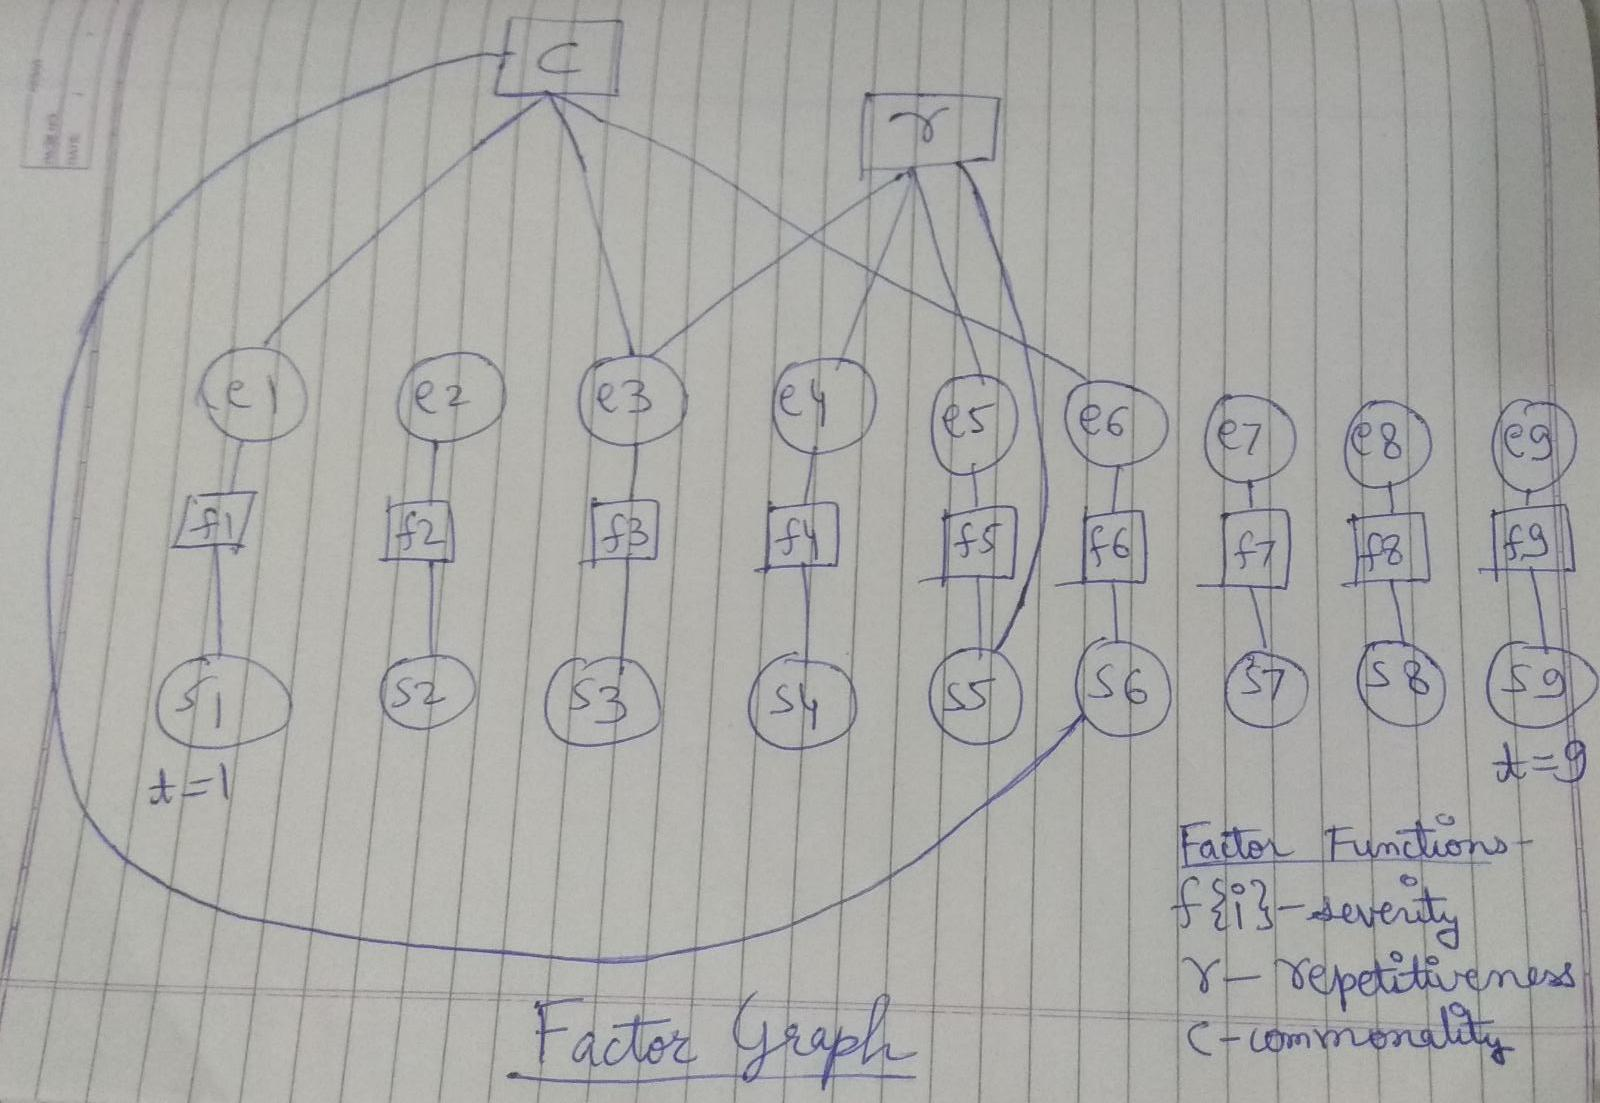

In [207]:
Image('factorgraph3_2.jpeg')

### Task 3.3

In [208]:
# G = FactorGraph() ## Create FactorGraph object
# ###############################
# #   TODO: Define factor functions
# ###############################
# f_1 = DiscreteFactor(['e1','s1'],[1,11],values = e_1_values)
# f_2 = DiscreteFactor(['e2','s2'],[1,11],values = e_2_values)
# f_3 = DiscreteFactor(['e3','s3'],[1,11],values = e_3_values)
# f_4 = DiscreteFactor(['e4','s4'],[1,11],values = e_3_values)
# f_5 = DiscreteFactor(['e5','s5'],[1,11],values = e_3_values)
# f_6 = DiscreteFactor(['e6','s6'],[1,11],values = e_4_values)
# f_7 = DiscreteFactor(['e7','s7'],[1,11],values = e_5_values)
# f_8 = DiscreteFactor(['e8','s8'],[1,11],values = e_5_values)
# f_9 = DiscreteFactor(['e9','s9'],[1,11],values = e_5_values)

# r = DiscreteFactor(['e3','e4','e5','s5'],[1,1,1,11],values = r_values)
# c = DiscreteFactor(['e1','e3','e6','s6'],[1,1,1,11],values = c_values) 
# ###############################
# #   TODO: Add random variables
# #         and factor functions 
# ###############################
# G.add_nodes_from(['e1','e2','e3','e4','e5','e6','e7','e8','e9',\
#                   's1','s2','s3','s4','s5','s6','s7','s8','s9'])  ## Add random variables 
# G.add_factors(f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,r,c)     ## Add factor functions

# ###############################
# #   TODO: Add the edges for random 
# #   variables and factor functions
# ###############################
# G.add_edges_from([('s1',f_1), ('e1', f_1),
#                   ('s2',f_2), ('e2', f_2),
#                   ('s3',f_3), ('e3', f_3),
#                   ('s4',f_4), ('e4', f_4),
#                   ('s5',f_5), ('e5', f_5),
#                   ('s6',f_6), ('e6', f_6),
#                   ('s7',f_7), ('e7', f_7),
#                   ('s8',f_8), ('e8', f_8),
#                   ('s9',f_9), ('e9', f_9),
#                   ('s5',r), ('e3', r), ('e4', r), ('e5', r),
#                   ('s6',c), ('e1', c), ('e3', c), ('e6', c)])

# ###############################
# #   TODO: Do the inference
# ###############################
# bp = BeliefPropagation(G)


"""Graph is disconnected hence we will need to do Factor graph predicitons seaprately.
 f2,f7,f8,f9 are independent.
 Each stage @ each time series has 11 possible options. So 9x11 matrix for marginal probabilities
"""


# Factor Graphs
G_2 = FactorGraph()
G_7 = FactorGraph()
G_8 = FactorGraph()
G_9 = FactorGraph()
G_connected = FactorGraph()

# Factor Functions
f_1 = DiscreteFactor(['e1','s1'],[1,11],values = e_1_values)
f_2 = DiscreteFactor(['e2','s2'],[1,11],values = e_2_values)
f_3 = DiscreteFactor(['e3','s3'],[1,11],values = e_3_values)
f_4 = DiscreteFactor(['e4','s4'],[1,11],values = e_3_values)
f_5 = DiscreteFactor(['e5','s5'],[1,11],values = e_3_values)
f_6 = DiscreteFactor(['e6','s6'],[1,11],values = e_4_values)
f_7 = DiscreteFactor(['e7','s7'],[1,11],values = e_5_values)
f_8 = DiscreteFactor(['e8','s8'],[1,11],values = e_5_values)
f_9 = DiscreteFactor(['e9','s9'],[1,11],values = e_5_values)


# Add nodes and factors
G_2.add_nodes_from(['e2','s2'])  
G_2.add_factors(f_2)

G_7.add_nodes_from(['e7','s7'])  
G_7.add_factors(f_7)  

G_8.add_nodes_from(['e8','s8'])  
G_8.add_factors(f_8)  

G_9.add_nodes_from(['e9','s9'])  
G_9.add_factors(f_9)  

G_connected.add_nodes_from(['e1','e3','e4','e5','e6','s1','s3','s4','s5','s6']) 
G_connected.add_factors(f_1,f_3,f_4,f_5,f_6,r,c)     



# Add edges
G_2.add_edges_from([('s2',f_2), ('e2', f_2)])
G_7.add_edges_from([('s7',f_7), ('e7', f_7)])
G_8.add_edges_from([('s8',f_8), ('e8', f_8)])
G_9.add_edges_from([('s9',f_9), ('e9', f_9)])
G_connected.add_edges_from([('s1',f_1), ('e1', f_1),
                  ('s3',f_3), ('e3', f_3),
                  ('s4',f_4), ('e4', f_4),
                  ('s5',f_5), ('e5', f_5),
                  ('s6',f_6), ('e6', f_6),
                  ('s5',r), ('e3', r), ('e4', r), ('e5', r),
                  ('s6',c), ('e1', c), ('e3', c), ('e6', c)])

# Belief Propogation from Factor Graph

bp_2 = BeliefPropagation(G_2)
bp_7 = BeliefPropagation(G_7)
bp_8 = BeliefPropagation(G_8)
bp_9 = BeliefPropagation(G_9)
bp_connected = BeliefPropagation(G_connected)



### Task 3.4

#### a. At every time point, provide the marginal probability of each state (Since we have 9 time points and 11 possible states, you should provide 99 probability values here)

In [209]:
# Marginal Probability
marginal_proba = [None]*9
disconnected_nodes = [2,7,8,9]
connected_nodes = [1,3,4,5,6]

for i in disconnected_nodes:
    marginal_proba[i-1] = eval('bp_'+str(i)).query(variables = ['s'+str(i)], show_progress = False)
    marginal_proba[i-1].normalize()
    

for i in connected_nodes:
    marginal_proba[i-1] = bp_connected.query(variables = ['s'+str(i)], show_progress = False)
    marginal_proba[i-1].normalize()

for i in range(0,9):
    print(marginal_proba[i])

+--------+-----------+
| s1     |   phi(s1) |
+========+===========+
| s1(0)  |    0.9360 |
+--------+-----------+
| s1(1)  |    0.0640 |
+--------+-----------+
| s1(2)  |    0.0000 |
+--------+-----------+
| s1(3)  |    0.0000 |
+--------+-----------+
| s1(4)  |    0.0000 |
+--------+-----------+
| s1(5)  |    0.0000 |
+--------+-----------+
| s1(6)  |    0.0000 |
+--------+-----------+
| s1(7)  |    0.0000 |
+--------+-----------+
| s1(8)  |    0.0000 |
+--------+-----------+
| s1(9)  |    0.0000 |
+--------+-----------+
| s1(10) |    0.0000 |
+--------+-----------+
+--------+-----------+
| s2     |   phi(s2) |
+========+===========+
| s2(0)  |    1.0000 |
+--------+-----------+
| s2(1)  |    0.0000 |
+--------+-----------+
| s2(2)  |    0.0000 |
+--------+-----------+
| s2(3)  |    0.0000 |
+--------+-----------+
| s2(4)  |    0.0000 |
+--------+-----------+
| s2(5)  |    0.0000 |
+--------+-----------+
| s2(6)  |    0.0000 |
+--------+-----------+
| s2(7)  |    0.0000 |
+--------+-

#### b. At every time point, provide the most probable state

In [210]:
most_prob_states = [0]*9
for i in range(0,9):
    state = np.argmax(marginal_proba[i].values)+1
    for k,v in ATTACK_STATES_MAP.items():
        if v == state:
            most_prob_states[i] = v
            print('Most Probable State at time, t = {0} : {1} ({2})'.format(i+1,k,v))
            break

Most Probable State at time, t = 1 : benign (1)
Most Probable State at time, t = 2 : benign (1)
Most Probable State at time, t = 3 : benign (1)
Most Probable State at time, t = 4 : benign (1)
Most Probable State at time, t = 5 : privilege_escalation (5)
Most Probable State at time, t = 6 : persistence (6)
Most Probable State at time, t = 7 : exfiltration (9)
Most Probable State at time, t = 8 : exfiltration (9)
Most Probable State at time, t = 9 : exfiltration (9)


### Task 3.5

In [211]:
ACTIONS = {
    # each value in an actions' vector corresponds to an attack stage
    'NO-OP':   [1.,   0.61, 0.69, 0.09, 0.2 , 0. ,  0.,   0.,   0. ,  0. ,  0.  ],
    'MONITOR': [0.  , 0.39, 0.31 ,0.84, 0.63, 0.7,  0.07 ,0.1 , 0. ,  0. ,  0.  ],
    'STOP':    [0.  , 0.,   0.  , 0.07, 0.17, 0.3,  0.93 ,0.9 , 1. ,  1. ,  1.  ]
}

actions_to_take = []
for i,state in enumerate(most_prob_states):
    max_p = -1
    action_to_take = None
    for action,probs in ACTIONS.items():
        if probs[state-1] > max_p:
            action_to_take = action
            max_p = probs[state-1]
    actions_to_take.append(action_to_take)
    print('Action to take at time, t = {0}: {1}'.format(i+1,action_to_take))

Action to take at time, t = 1: NO-OP
Action to take at time, t = 2: NO-OP
Action to take at time, t = 3: NO-OP
Action to take at time, t = 4: NO-OP
Action to take at time, t = 5: MONITOR
Action to take at time, t = 6: MONITOR
Action to take at time, t = 7: STOP
Action to take at time, t = 8: STOP
Action to take at time, t = 9: STOP


### Task 3.6

#### Indicate the earliest stage in which your model should recommend stopping the attack

In [212]:
print('Earliest "STOP" action occurs at stage: ', actions_to_take.index('STOP')+1)

Earliest "STOP" action occurs at stage:  7


### Task 3.7

In [213]:
"""Comment out Stage S7 and E7"""
# Factor Graphs
G_2 = FactorGraph()
# G_7 = FactorGraph()
G_8 = FactorGraph()
G_9 = FactorGraph()
G_connected = FactorGraph()

# Factor Functions
f_1 = DiscreteFactor(['e1','s1'],[1,11],values = e_1_values)
f_2 = DiscreteFactor(['e2','s2'],[1,11],values = e_2_values)
f_3 = DiscreteFactor(['e3','s3'],[1,11],values = e_3_values)
f_4 = DiscreteFactor(['e4','s4'],[1,11],values = e_3_values)
f_5 = DiscreteFactor(['e5','s5'],[1,11],values = e_3_values)
f_6 = DiscreteFactor(['e6','s6'],[1,11],values = e_4_values)
# f_7 = DiscreteFactor(['e7','s7'],[1,11],values = e_5_values)
f_8 = DiscreteFactor(['e8','s8'],[1,11],values = e_5_values)
f_9 = DiscreteFactor(['e9','s9'],[1,11],values = e_5_values)


# Add nodes and factors
G_2.add_nodes_from(['e2','s2'])  
G_2.add_factors(f_2)

# G_7.add_nodes_from(['e7','s7'])  
# G_7.add_factors(f_7)  

G_8.add_nodes_from(['e8','s8'])  
G_8.add_factors(f_8)  

G_9.add_nodes_from(['e9','s9'])  
G_9.add_factors(f_9)  

G_connected.add_nodes_from(['e1','e3','e4','e5','e6','s1','s3','s4','s5','s6']) 
G_connected.add_factors(f_1,f_3,f_4,f_5,f_6,r,c)     



# Add edges
G_2.add_edges_from([('s2',f_2), ('e2', f_2)])
# G_7.add_edges_from([('s7',f_7), ('e7', f_7)])
G_8.add_edges_from([('s8',f_8), ('e8', f_8)])
G_9.add_edges_from([('s9',f_9), ('e9', f_9)])
G_connected.add_edges_from([('s1',f_1), ('e1', f_1),
                  ('s3',f_3), ('e3', f_3),
                  ('s4',f_4), ('e4', f_4),
                  ('s5',f_5), ('e5', f_5),
                  ('s6',f_6), ('e6', f_6),
                  ('s5',r), ('e3', r), ('e4', r), ('e5', r),
                  ('s6',c), ('e1', c), ('e3', c), ('e6', c)])

# Belief Propogation from Factor Graph

bp_2 = BeliefPropagation(G_2)
# bp_7 = BeliefPropagation(G_7)
bp_8 = BeliefPropagation(G_8)
bp_9 = BeliefPropagation(G_9)
bp_connected = BeliefPropagation(G_connected)



# Marginal Probability
marginal_proba = [None]*9
disconnected_nodes = [2,8,9]
connected_nodes = [1,3,4,5,6]

for i in disconnected_nodes:
    marginal_proba[i-1] = eval('bp_'+str(i)).query(variables = ['s'+str(i)], show_progress = False)
    marginal_proba[i-1].normalize()
    

for i in connected_nodes:
    marginal_proba[i-1] = bp_connected.query(variables = ['s'+str(i)], show_progress = False)
    marginal_proba[i-1].normalize()

most_prob_states = [0]*9
for i in [0,1,2,3,4,5,7,8]:
    state = np.argmax(marginal_proba[i].values)+1
    for k,v in ATTACK_STATES_MAP.items():
        if v == state:
            most_prob_states[i] = v
            print('Most Probable State at time, t = {0} : {1} ({2})'.format(i+1,k,v))
            break

Most Probable State at time, t = 1 : benign (1)
Most Probable State at time, t = 2 : benign (1)
Most Probable State at time, t = 3 : benign (1)
Most Probable State at time, t = 4 : benign (1)
Most Probable State at time, t = 5 : privilege_escalation (5)
Most Probable State at time, t = 6 : persistence (6)
Most Probable State at time, t = 8 : exfiltration (9)
Most Probable State at time, t = 9 : exfiltration (9)


#### a. Judge whether the most probable states for $s_1-s_6,s_8,s_9$ remain the same as Task3.2
#### b. State the reason for your judgement

a),b)  We see that the most probable states remain the same. This is because the factor graph related to S7,E7 is disjoint from factorgraphs. It will not interfere with belief propogation in other timesteps

### Task 3.8

#### a. Draw an HMM model for the attack scenario given the provided states and events.
#### b. What parameters are needed for this HMM model to work?
#### c. Give an example of an advantage of the FG over the HMM model.

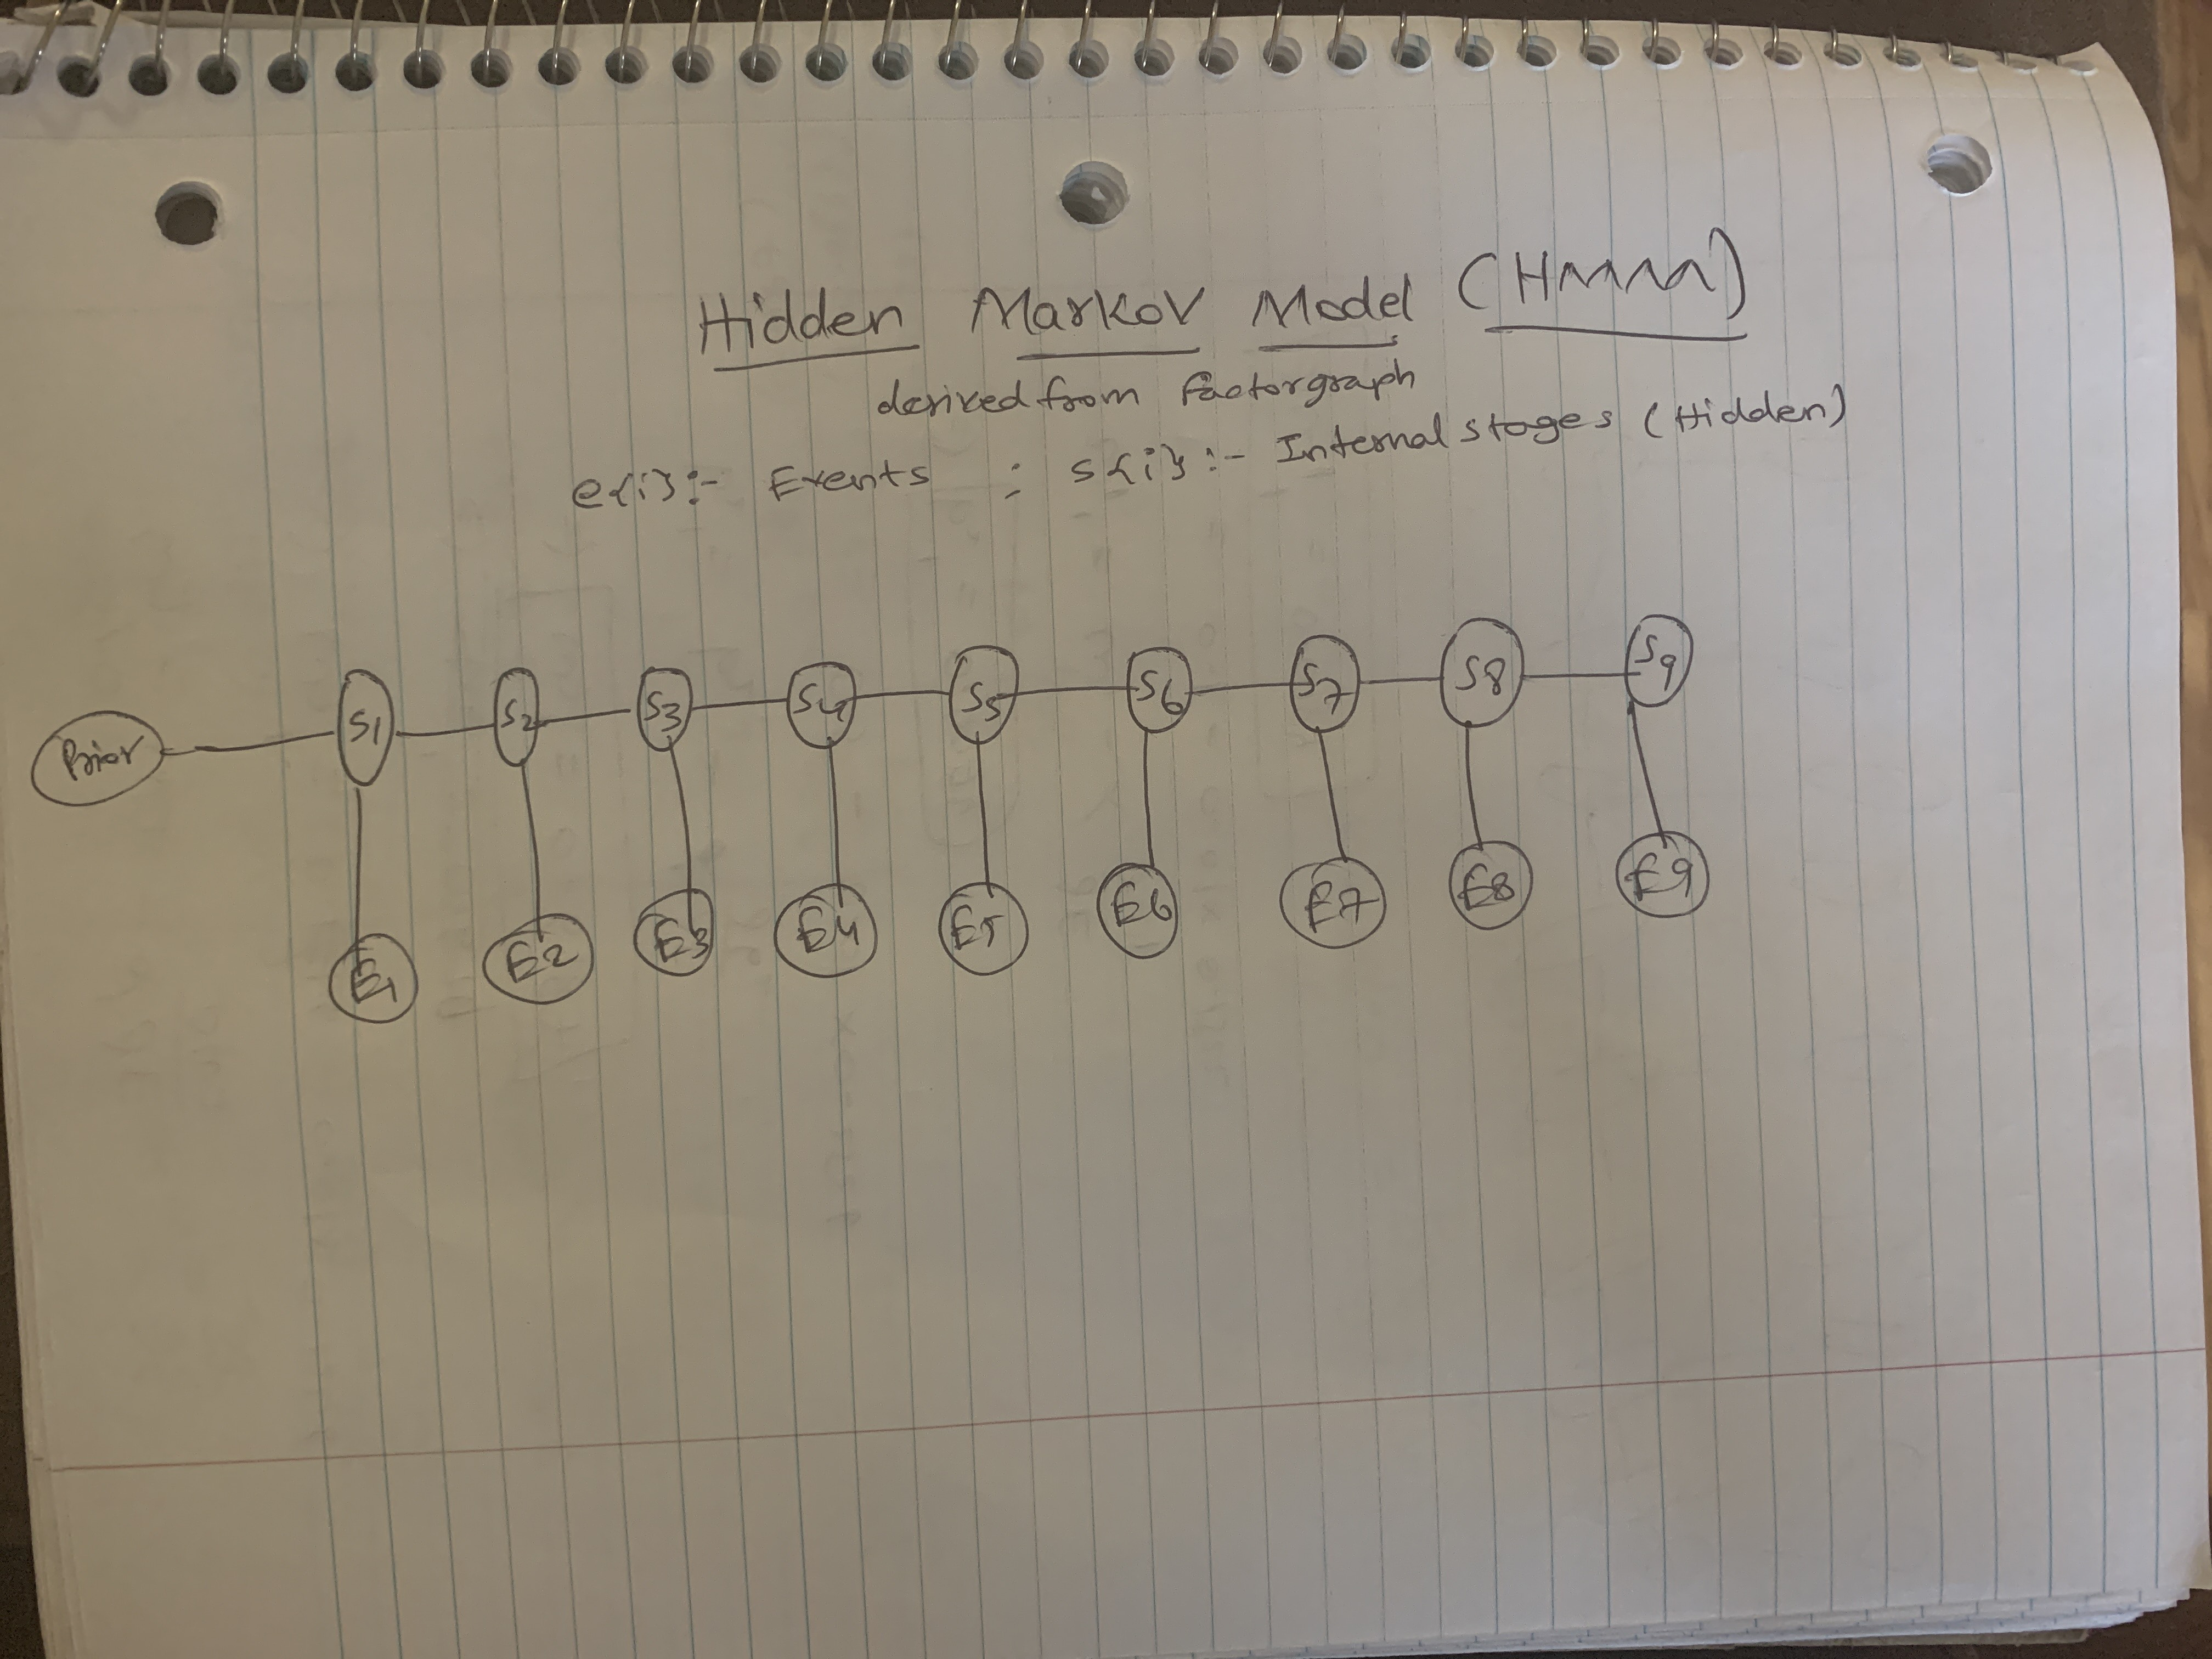

In [214]:
Image('HMM_task3.png')

b)  
**State Transition Matrix**: from S{i} to S{i+1} for all i in range(1,9) <br>
**Prior Probabilities**: for each of the 11 stages <br>
**Observation Matrix**: S{i} to E{j}. It is a 11x5 matrix


c) Factor Graphs are better in the sense HMM subsumes FGs. <br>
Factor Graphs are able to capture complex relationships between multiple time steps. For example, in this project, we observe that e1,e3,e4,e6 are related by commonality. There is a finite probability that when events occur in this fashion --> attack is highely likely.

## Task 4

### Subtask 4.0

No, it is not possible to predict with 100% accuracy because at every stage there is a chance (finite probability) that seqeunce of events is benign i.e. not an attack.

### Subtask 4.1

Examples of legitimate events (benign) which could be clssified as attacks i.e. false positives <br>
**Scan:** Sysadmin could be routinely scanning for servers.<br>
**Login:** Any user/customer can login to the equifax website. <br>
**Sensitive URI:** Software Engineer/Web Developer may be updating the website by downloading certain files from some other host website. <br>
**New Executable File:** Continuation of above. Say a javascript file (executable) is downloaded<br>
**Homepage overwritten with a new link:** Since changes are made, the developer needs to update the website pages<br>
**Webserver restarted:** Conitnuing the above example, to display the updated website to customers, a webserver restart will overwrite any cached data from old website.<br>

### Subtask 4.2

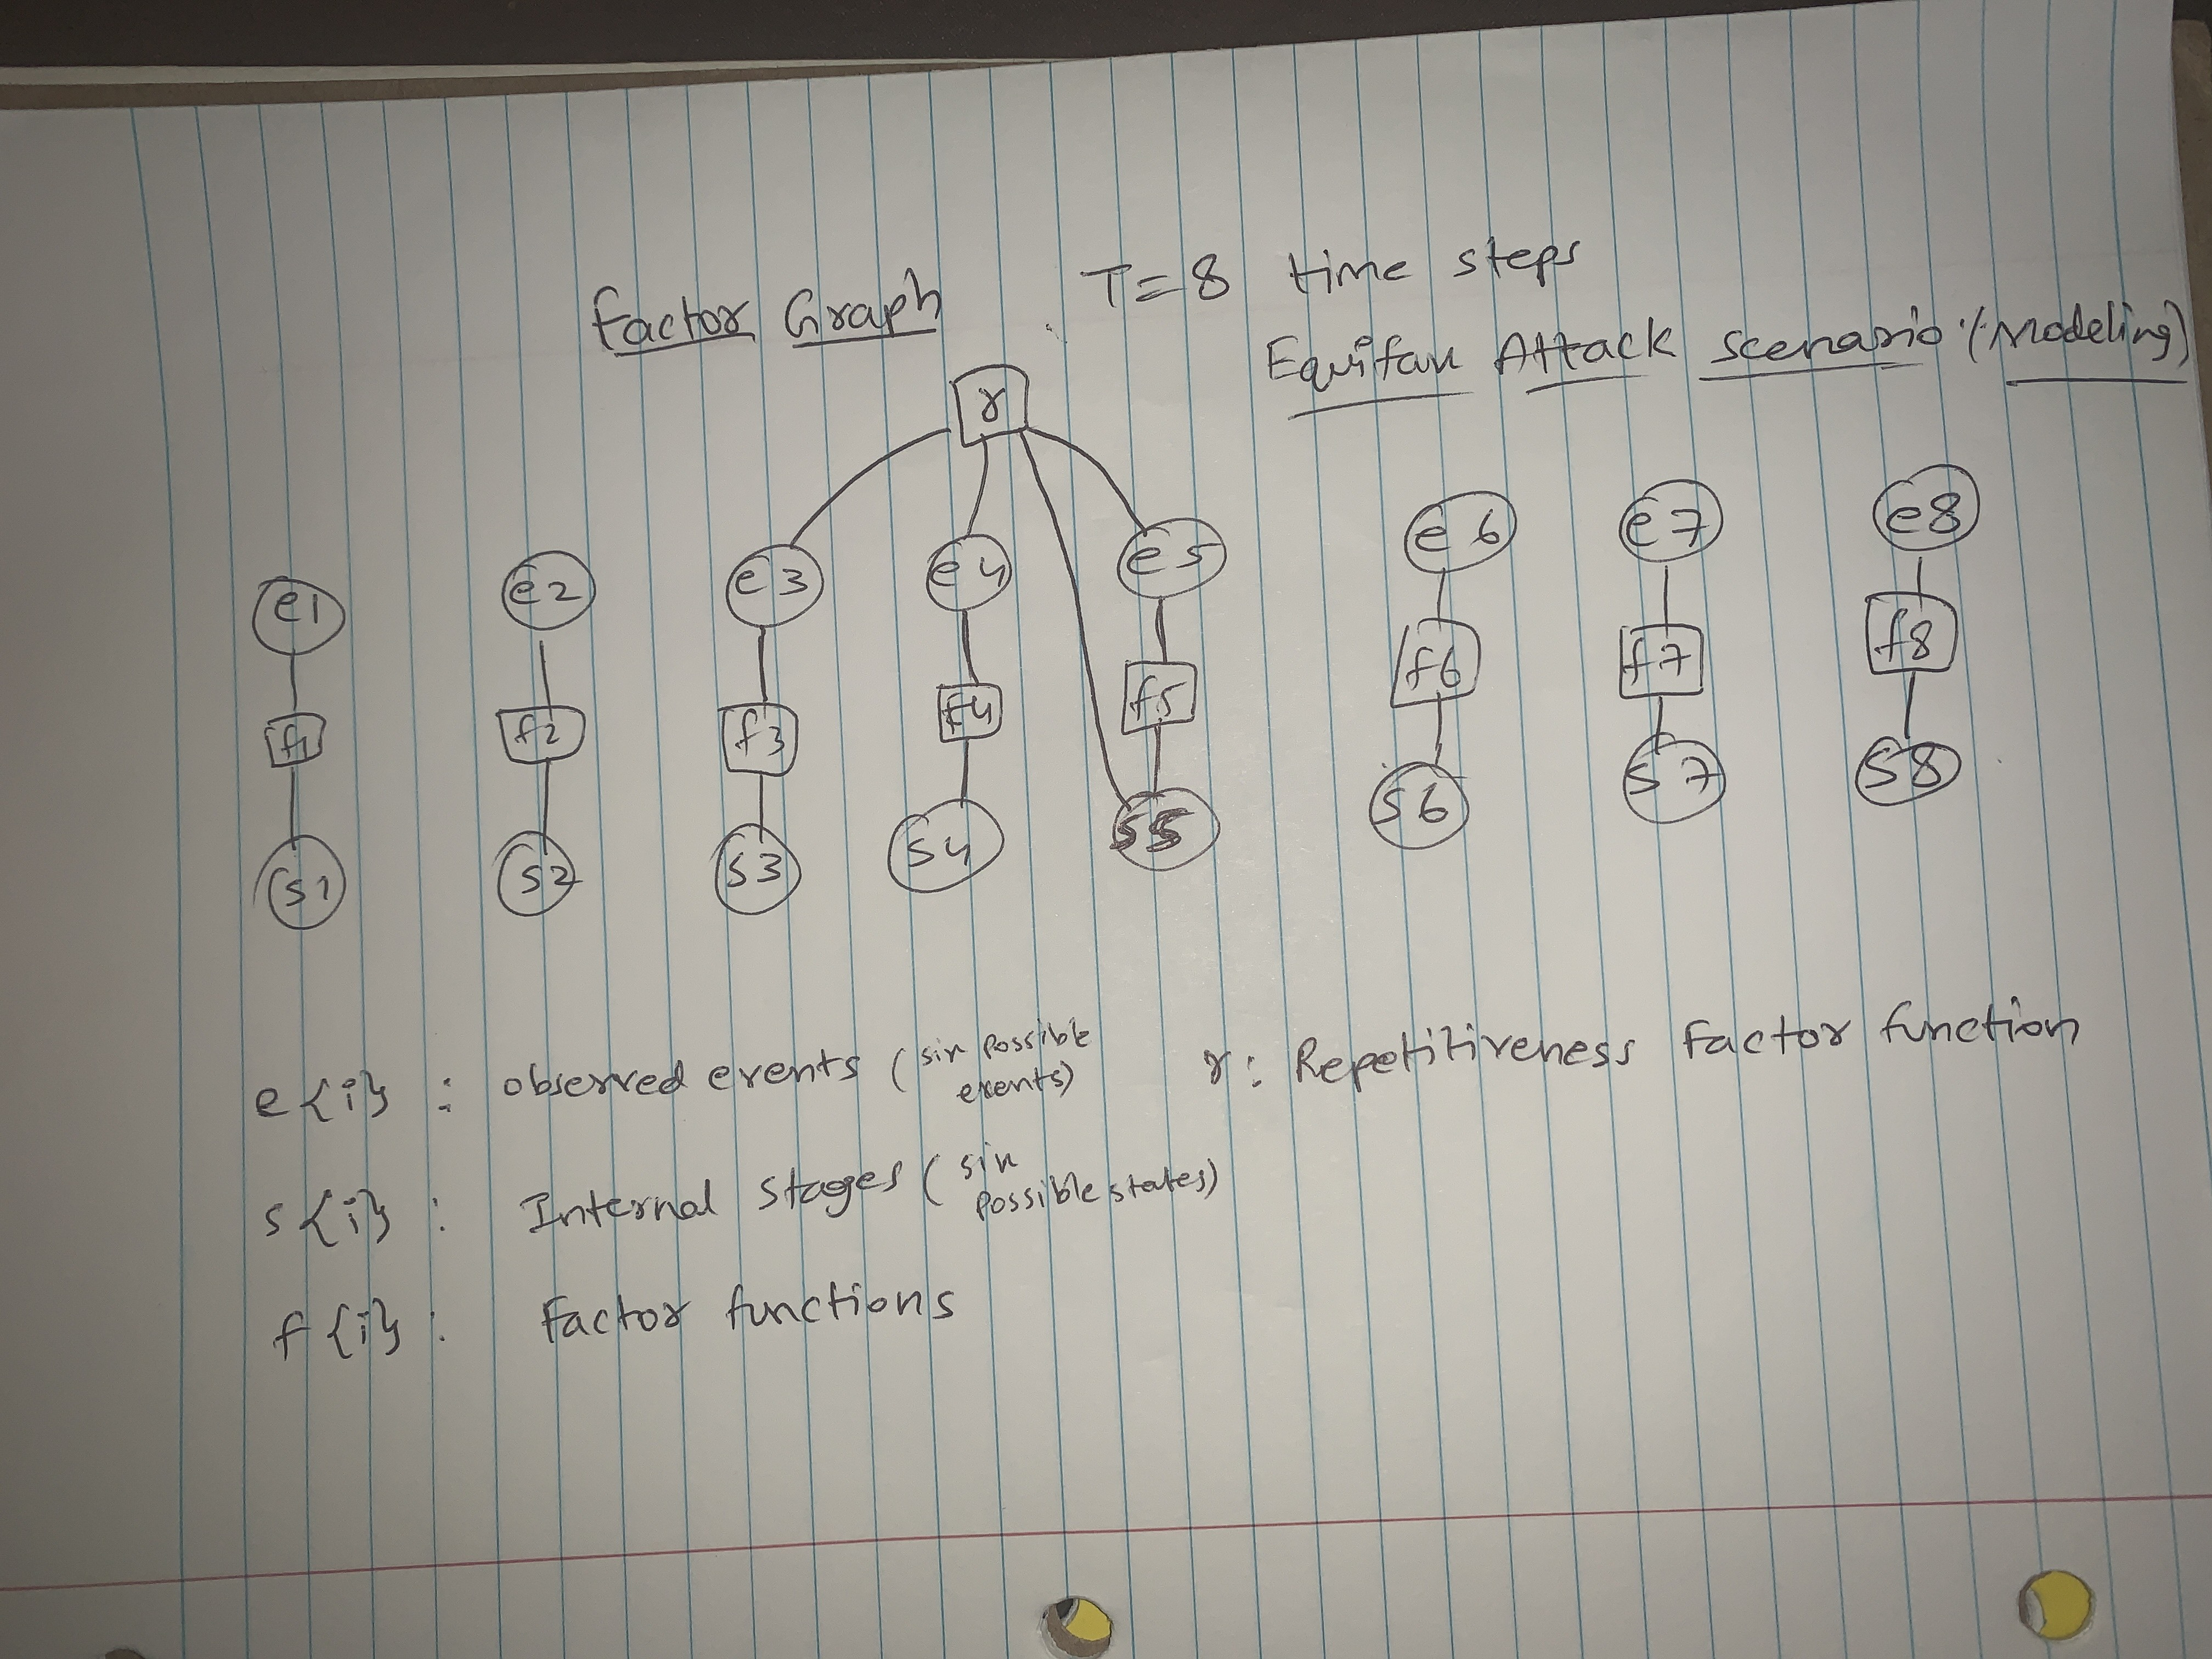

In [215]:
Image('factorgraph4_2.jpeg')

### Subtask 4.3

**events**: e1-s5 and **stages**: s1-s5 and **factor functions**: f1-f5, r are common in both factor graphs drawn in 3.2 and 4.2